# Big Mart Sales

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [29]:
# Data reading

data = pd.read_csv('data/train.csv')

## Hypothesis

* The sales of a Item in a particular store (Item_Outlet_Sales) will depend upon the 'Outlet_Size', 'Outlet_Location_Type', and 'Outlet_Type'.
* There is a linear relationship between 'Item_Weight', 'Item_Visibility', 'Item_MRP', and 'Item_Outlet_Sales'


In [31]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [33]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
def normality(data):
    # perform normality test
    statistic, p_value = stats.normaltest(data, nan_policy='omit')

    # print results
    print("Statistic:", statistic)
    print("p-value:", p_value)

    alpha = 0.05
    if p_value < alpha:
        print("The null hypothesis can be rejected. The data is not normal.")
    else:
        print("The null hypothesis cannot be rejected. The data is normal.")

def t_test(data1, data2):
    
    # perform t-test
    statistic, p_value = stats.ttest_ind(data1, data2, nan_policy='omit')

    # print results
    print("Statistic:", statistic)
    print("p-value:", p_value)

    alpha = 0.05
    if p_value < alpha:
        print("The null hypothesis can be rejected. The means are significantly different.")
    else:
        print("The null hypothesis cannot be rejected. The means are not significantly different.")



normality(data['Item_Weight'])

Statistic: 8006.8002569227865
p-value: 0.0
The null hypothesis can be rejected. The data is not normal.


In [35]:
normality(data['Item_Visibility'])

Statistic: 1590.35215138803
p-value: 0.0
The null hypothesis can be rejected. The data is not normal.


In [36]:
normality(data['Item_MRP'])

Statistic: 1132.3792081604877
p-value: 1.2793201401151812e-246
The null hypothesis can be rejected. The data is not normal.


In [37]:
normality(data['Item_Outlet_Sales'])

Statistic: 1591.791909986951
p-value: 0.0
The null hypothesis can be rejected. The data is not normal.


In [38]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
prof

In [40]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data.dropna(inplace=True)

In [41]:
data['Outlet_Size'].isnull().sum()

0

In [42]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [43]:
# Standardisation Item_MRP, Item_visibility, Item_weight


def normal_scaler(df, cols):

    scaler = StandardScaler()
    scaler.fit(df[cols])
    
    scaled_data = scaler.transform(df[cols])
    
    scaled_df = pd.DataFrame(scaled_data, columns=cols)
    
    return scaler, scaled_df
    
def encoder(df, cols):
     
    encoder = OrdinalEncoder()
    encoder.fit(df[cols])

    encoded_data = encoder.transform(df[cols])


    encoded_df = pd.DataFrame(encoded_data, columns=cols )
        
    return encoder, encoded_df

In [44]:

cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type' ,'Outlet_Size']
cont_cols = ['Item_MRP', 'Item_Weight', 'Item_Visibility']

encoder_obj, feat_data = encoder(data, cat_cols)
scaler_obj, scal_data = normal_scaler(data, cont_cols)


c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

Text(0.5, 0.98, 'scaled data')

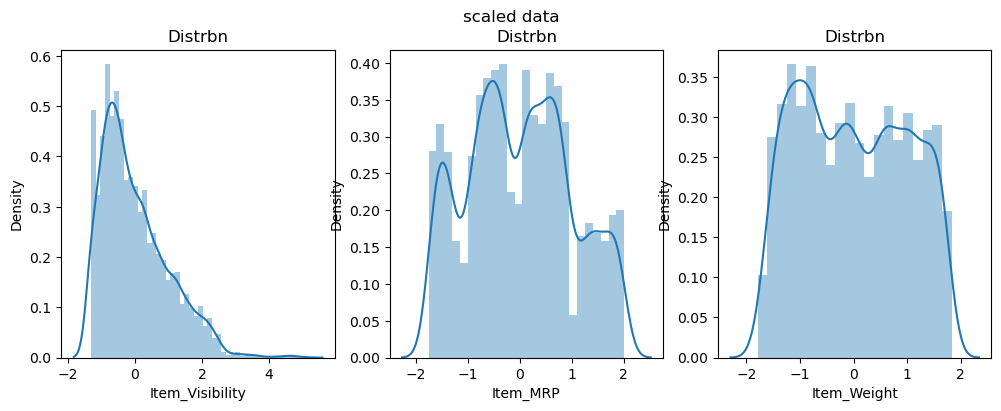

In [45]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.distplot(scal_data['Item_Visibility'], ax=ax[0])
ax[0].set_title('Distrbn')
sns.distplot(scal_data['Item_MRP'],ax=ax[1])
ax[1].set_title('Distrbn')
sns.distplot(scal_data['Item_Weight'], ax=ax[2])
ax[2].set_title('Distrbn')
fig.suptitle('scaled data')

c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 0.98, 'Identifying outliers')

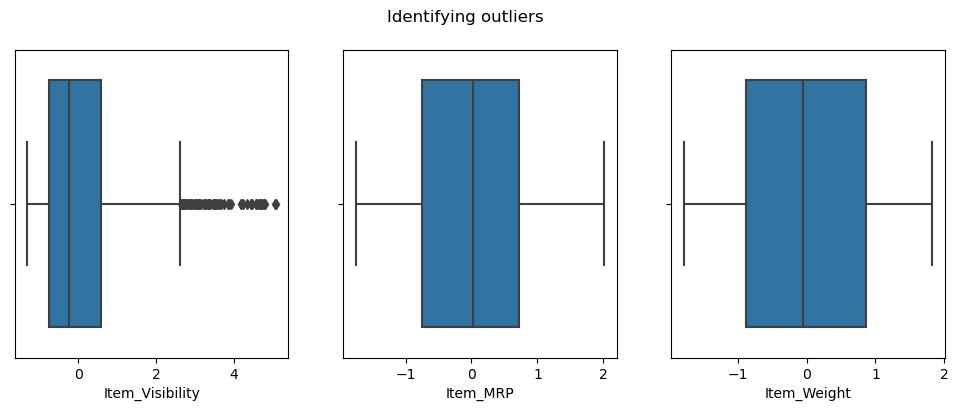

In [46]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

sns.boxplot(scal_data['Item_Visibility'], ax=ax[0])

sns.boxplot(scal_data['Item_MRP'],ax=ax[1])

sns.boxplot(scal_data['Item_Weight'], ax=ax[2])


fig.suptitle('Identifying outliers')

c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 0.98, 'Count Plot')

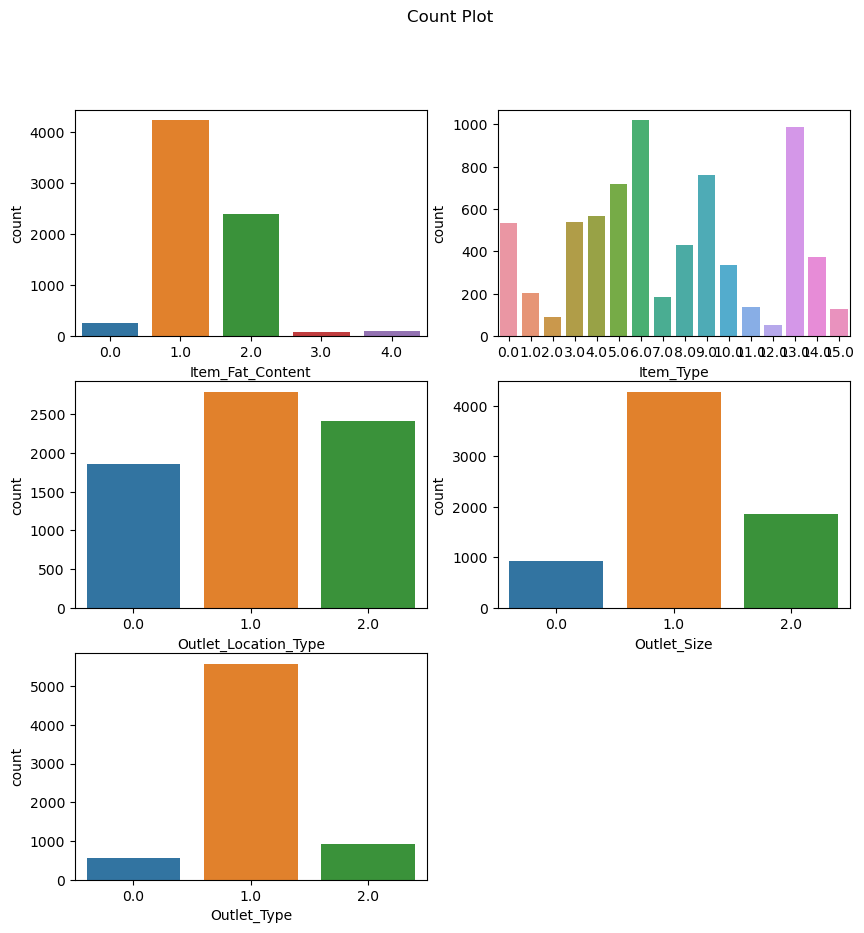

In [47]:

fig, ax = plt.subplots(3,2,figsize=(10,10))

sns.countplot(feat_data['Item_Fat_Content'], ax=ax[0,0])

sns.countplot(feat_data['Item_Type'], ax=ax[0,1])

sns.countplot(feat_data['Outlet_Location_Type'], ax=ax[1,0])

sns.countplot(feat_data['Outlet_Size'], ax=ax[1,1])

sns.countplot(feat_data['Outlet_Type'], ax=ax[2,0])

ax[2, 1].axis('off')

fig.suptitle('Count Plot')

In [48]:
features = pd.concat([scal_data, feat_data, data['Item_Outlet_Sales']], axis=1)
features

,Item_MRP,Item_Weight,Item_Visibility,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Outlet_Size,Item_Outlet_Sales
0,1.739672,-0.766217,-0.985493,1.0,4.0,0.0,1.0,1.0,3735.1380
1,-1.489749,-1.494175,-0.919043,2.0,14.0,2.0,2.0,1.0,443.4228
2,0.006046,0.999834,-0.970833,1.0,10.0,0.0,1.0,1.0,2097.2700
3,0.654638,1.365966,-1.315539,2.0,6.0,2.0,0.0,1.0,732.3800
4,-1.400141,-0.845905,-1.315539,1.0,9.0,2.0,1.0,0.0,994.7052
...,...,...,...,...,...,...,...,...,...
8518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2778.3834
8519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.2850
8520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1193.1136
8521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.5976


In [51]:
features['Outlet_Size'].fillna(features['Outlet_Size'].mode(), inplace= True)
features.dropna(inplace=True)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error



## splitting data

In [98]:
train_df, test_df = train_test_split(features, test_size=0.2, random_state=42)

In [99]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,[-1]]


X_test= test_df.iloc[:,:-1]
y_test = test_df.iloc[:,[-1]]


## Model Training

In [100]:
from sklearn.metrics import r2_score

def evaluate(model, x_test, y_test):
    
    predictions = model.predict(x_test)
    accuracy = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('Accuracy = {:0.2f}.'.format(accuracy))
    print(f'RMSE: {rmse:0.2f}')
    
    return accuracy



In [101]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

base_model.fit(X_train, y_train)

base_accuracy = evaluate(base_model, X_test, y_test)


C:\Users\sgangireddy\AppData\Local\Temp\ipykernel_1592\1064052445.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


Model Performance
Accuracy = -0.23.
RMSE: 1798.03


## Hyperparameter tuning

In [102]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)
random_accuracy = evaluate(rf_random, X_test, y_test)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\ProgramData\Anaconda3\envs\WINDOW\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Model Performance
Accuracy = -0.02.
RMSE: 1633.60
